# Brownian Bridge and Shauder functions

In [66]:
using Random, Distributions, Plots, BenchmarkTools

## Brownian Bridge generation
Consider $X(t)$ such that $X(0) = x$ and $X(T) = y$.

We can define $$X(t) = x+W(t)-\frac{t}{T}(W(T)+x-y)$$

In [67]:
# Helper function
function std_BM_cum_dt(dt::Float64,T::Float64)
    n = Int(T/dt)
    dW = sqrt(dt)*randn(n)
    W = [0;cumsum(dW)]
    return W
end

function brownian_bridge(dt::Float64,T::Float64,x::Float64,y::Float64)
    W = std_BM_cum_dt(dt,T)
    t = 0:dt:T
    X = x .+ W - t.*(W[end]+x-y)/T
    return X
end

function simulation_BB(N_sim::Vector,T::Float64,dt::Float64,x::Float64,y::Float64)
    # Returns a N_sim*dt_list*n array
    n = Int(T/dt)
    output = zeros(n+1,length(N_sim))
    for (i,N) = enumerate(N_sim)
        for k = 1:N
            output[:,i] += brownian_bridge(dt,T,x,y)
        end
        output[:,i] /= N
        println("dt: "*string(dt)*" nsim :"*string(N)*" done")
    end
    return output
end

simulation_BB (generic function with 1 method)

In [68]:
T = 2.0
x = 1.0
y = 2.0
dt_list = [2^(-4), 2^(-6), 2^(-8)]

3-element Vector{Float64}:
 0.0625
 0.015625
 0.00390625

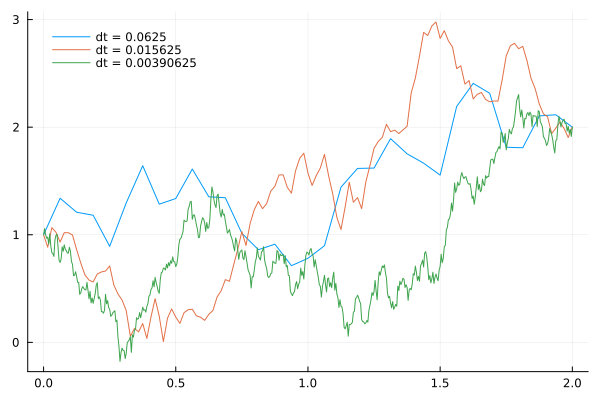

In [69]:
p = plot(foreground_color_legend = nothing,
         background_color_legend = nothing)
for (i,dt) = enumerate(dt_list)
   X = brownian_bridge(dt,T,x,y)
   plot!(0:dt:T,X,label="dt = "*string(dt))
end
p

dt: 0.0625 nsim :20 done
dt: 0.0625 nsim :200 done
dt: 0.0625 nsim :2000 done
dt: 0.015625 nsim :20 done
dt: 0.015625 nsim :200 done
dt: 0.015625 nsim :2000 done
dt: 0.00390625 nsim :20 done
dt: 0.00390625 nsim :200 done
dt: 0.00390625 nsim :2000 done


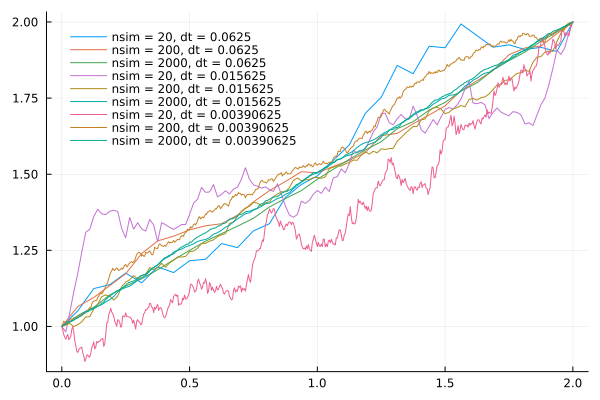

In [70]:
N_sim = [20,200,2000]
# Checking the means for each time t in 0,...,T
p = plot(foreground_color_legend = nothing,background_color_legend = nothing)
for (idx,dt) = enumerate(dt_list)
   mean_X = simulation_BB(N_sim,T,dt,x,y)
   for i_sim = 1:length(N_sim)
       plot!(0:dt:T,mean_X[:,i_sim],label="nsim = "*string(N_sim[i_sim])*", dt = "*string(dt))
   end
end
p